In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

import solt
import solt.transforms as slt


In [2]:
def vis_img_instances(img, m):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1)
    ax.imshow(img)
    ax.imshow(np.ma.masked_array(m, m==0), cmap='tab20', alpha=1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()


In [3]:
img = cv2.imread('data/oai_knee_mri.png')
mask = cv2.imread('data/oai_knee_mri_mask.png', 0)

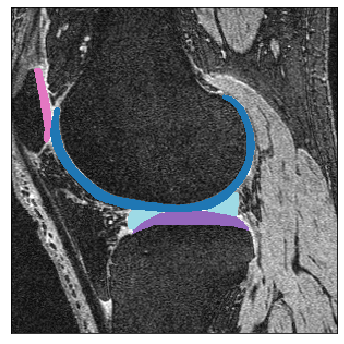

In [4]:
vis_img_instances(img, mask)

In [13]:
stream = solt.Stream([
    slt.Rotate(angle_range=(-20, 20), p=1, padding='r'),
    slt.Crop((256, 256)),
    solt.SelectiveStream([
        slt.GammaCorrection(gamma_range=0.5, p=1),
        slt.Noise(gain_range=0.1, p=1),
        slt.Blur()    
    ], n=3)
])

In [14]:
print(stream.to_yaml())

stream:
  ignore_fast_mode: false
  interpolation: null
  optimize_stack: false
  padding: null
  transforms:
  - rotate:
      angle_range:
      - -20
      - 20
      ignore_fast_mode: false
      ignore_state: true
      interpolation:
      - bilinear
      - inherit
      p: 1
      padding:
      - r
      - inherit
  - crop:
      crop_mode: c
  - selective_stream:
      ignore_fast_mode: false
      n: 3
      optimize_stack: false
      probs: null
      transforms:
      - gamma_correction:
          data_indices: null
          gamma_range:
          - 0.5
          - 1.5
          p: 1
      - noise:
          data_indices: null
          gain_range:
          - 0
          - 0.1
          p: 1
      - blur:
          data_indices: null
          gaussian_sigma:
          - 1
          - 1
          k_size:
          - 3
          - 3
          p: 0.5



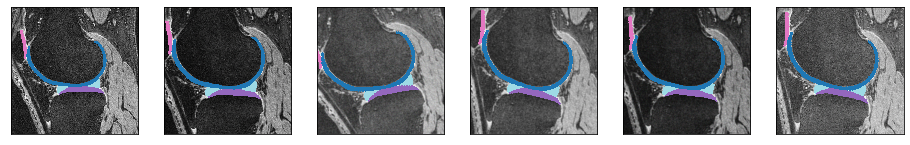

In [16]:
fig = plt.figure(figsize=(16,16))
n_augs = 6


random.seed(42)
for i in range(n_augs):
    img_aug, mask_aug = stream({'image': img, 'mask': mask}, return_torch=False).data

    ax = fig.add_subplot(1,n_augs,i+1)
    if i == 0:
        ax.imshow(img)
        ax.imshow(np.ma.masked_array(mask, mask==0), cmap='tab20', alpha=1)    
    else:
        ax.imshow(img_aug)
        ax.imshow(np.ma.masked_array(mask_aug, mask_aug==0), cmap='tab20', alpha=1)
    ax.set_xticks([])
    ax.set_yticks([])
plt.savefig('results/mri.png', bbox_inches='tight')
plt.show()